默认情况下，NeuralProphet 拟合加性季节性，这意味着季节性的影响被添加到趋势中以获得预测。这个航空乘客数量的时间序列是加法季节性不起作用的一个例子：

In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level, set_random_seed, df_utils

# 导入依赖
import warnings
import numpy as np

warnings.filterwarnings("ignore")

# Disable logging messages unless there is an error
set_log_level("ERROR")

Importing plotly failed. Interactive plots will not work.
Importing plotly failed. Interactive plots will not work.


In [3]:
data_location = "/home/ann/opt/iNeuralProphet/data"
df = pd.read_csv(data_location + "/air_passengers.csv")
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [4]:
m = NeuralProphet()
metrics = m.fit(df, freq="MS")
m.set_plotting_backend("plotly-static")

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

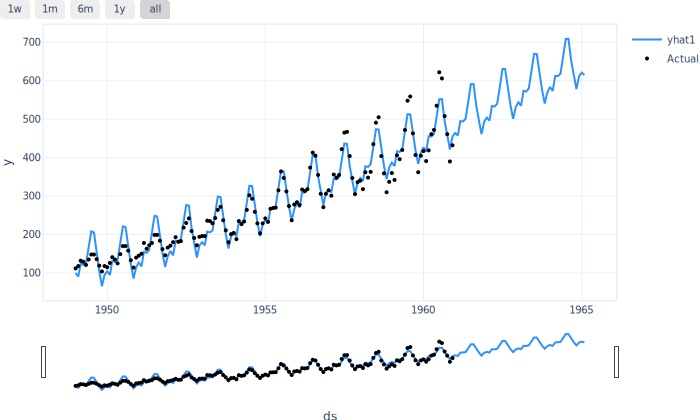

In [5]:
future = m.make_future_dataframe(df, periods=50, n_historic_predictions=len(df))
forecast = m.predict(future)
m.plot(forecast)
# m.plot_parameters()

该时间序列具有明确的年度周期，但预报中的季节性在时间序列开始时太大，在结束时太小。在这个时间序列中，季节性并不是 NeuralProphet 假设的恒定累加因素，而是随着趋势而增长。这是乘法季节性。

NeuralProphet 可以通过在输入参数中设置 seasonality_mode="multiplicative" 来对乘法季节性进行建模

In [6]:
m = NeuralProphet(seasonality_mode="multiplicative")
metrics = m.fit(df, freq="MS")
m.set_plotting_backend("plotly-static")

Training: |          | 0/? [00:00<?, ?it/s]

Finding best initial lr:   0%|          | 0/209 [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Predicting: |          | 0/? [00:00<?, ?it/s]

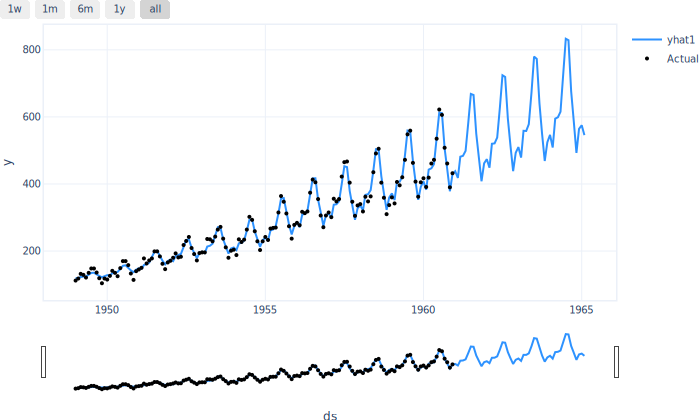

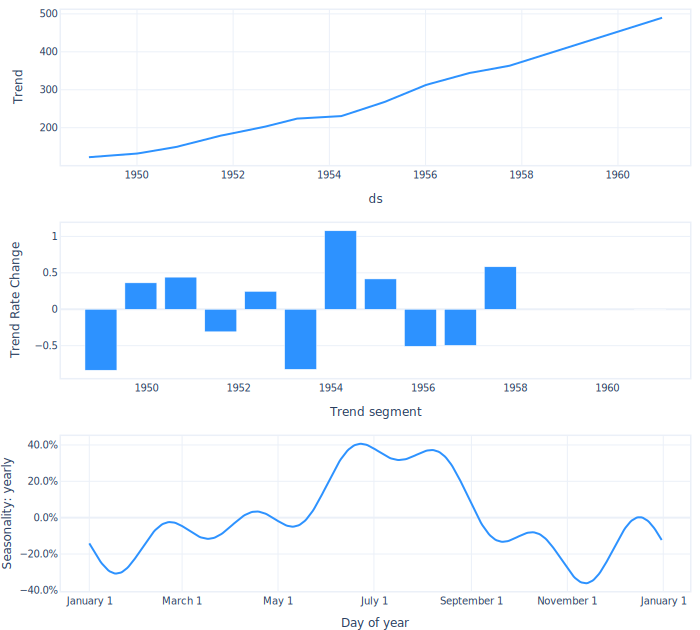

In [7]:
future = m.make_future_dataframe(df, periods=50, n_historic_predictions=len(df))
forecast = m.predict(future)
m.plot(forecast)
m.plot_parameters()

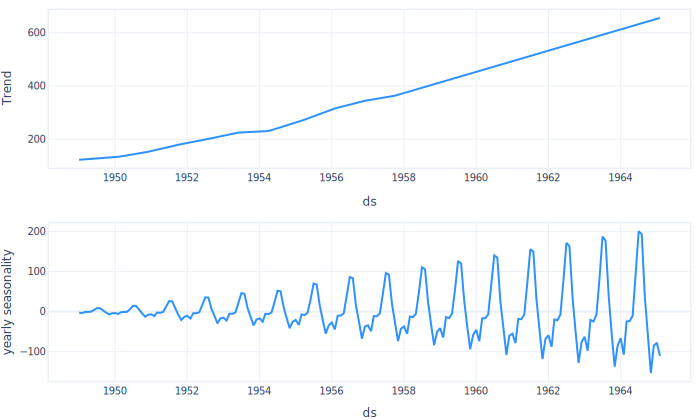

In [8]:
m.plot_components(forecast)

请注意，季节性仅适用于月初发生的数据。因此，绘制的季节性值在月份之间可能会采用随机值。

设置会 seasonality_mode="multiplicative" 将所有季节性建模为乘法，包括与 add_seasonality 添加的自定义季节性。